# Predict Graduate Admissions

# Erick Otuoma

 #Problem Statement: This dataset is created for prediction of Graduate Admissions froman Indian perspective. 

# The dataet contains everal parameters which are considered important during the applications for Masters Programs. These parameters are:
1. GRE Scores(out of 340)
2. TOEFL Scores(out of 120)
3. University Rating(out of 5)
4. Statement of Purpose and Letter of Recommendation(out of 5)
5. Undergraduate GPA(out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1) is the Target Variable


In [1]:
# Importing the liabraries
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
warnings.simplefilter('ignore')
from scipy import stats

In [2]:
# Reading the dataset and checking it
data=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
# Checking the firt five rows of the dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Checking the last 5 rowws  of the dataset
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
# Checking the columns of the dataset
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# There are 9 columns in the dataset.

# Data Munging and Wrangling

In [6]:
# Checking the data types of the columns
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

The data consist of integers and floats

In [7]:
# Checking the shape of the ddata
data.shape

(500, 9)

The data has 500 rows and 9 columns.

In [8]:
# Checcking for null values in the columns
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Fortunately our dataset has null values.

In [9]:
# Checking the summary statistics
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Droping the Serial No column
data.drop('Serial No.',axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Exploratory Data  Analysis

In [11]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

The "chance" column is the outcome variable and takes value between 0 and 1. 1 represents that the subject is admitted to the program while 0 represents rejected applications. Problem can be classified as a binary classification problem where outcome probability refers to the probability of subject being admitted to the program. Since only chance of admission is provided, the analysis will continue as a prediction analysis of chance of admission.

In [12]:
# cheching the summary statistics
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

The mean, or average.
50% aka Median it is very import to understand Skeweness of the Data
The standard deviation, or how spread out the data is.
The minimum and maximum value of each column
The number of items that fall within the first, second, and third percentiles.

In [13]:
data.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 80% of chance which is the third quartile of the chance data.

# Let's perform some EDA to gain insights

Chance of Admit will be the respoonse variable and proceed to check the individual columns'correlation with the response variable.

In [14]:
# Checking the correlation coefficient of TOEFL Score with Chance of Admit
data.columns = data.columns.str.strip()
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
data[['TOEFL Score', 'Chance of Admit']].corr()

,TOEFL Score,Chance of Admit
TOEFL Score,1.000000,0.792228
Chance of Admit,0.792228,1.000000


TOEFL Score tends to be a good fit. Let us explore other columns and get to see the correlation.

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

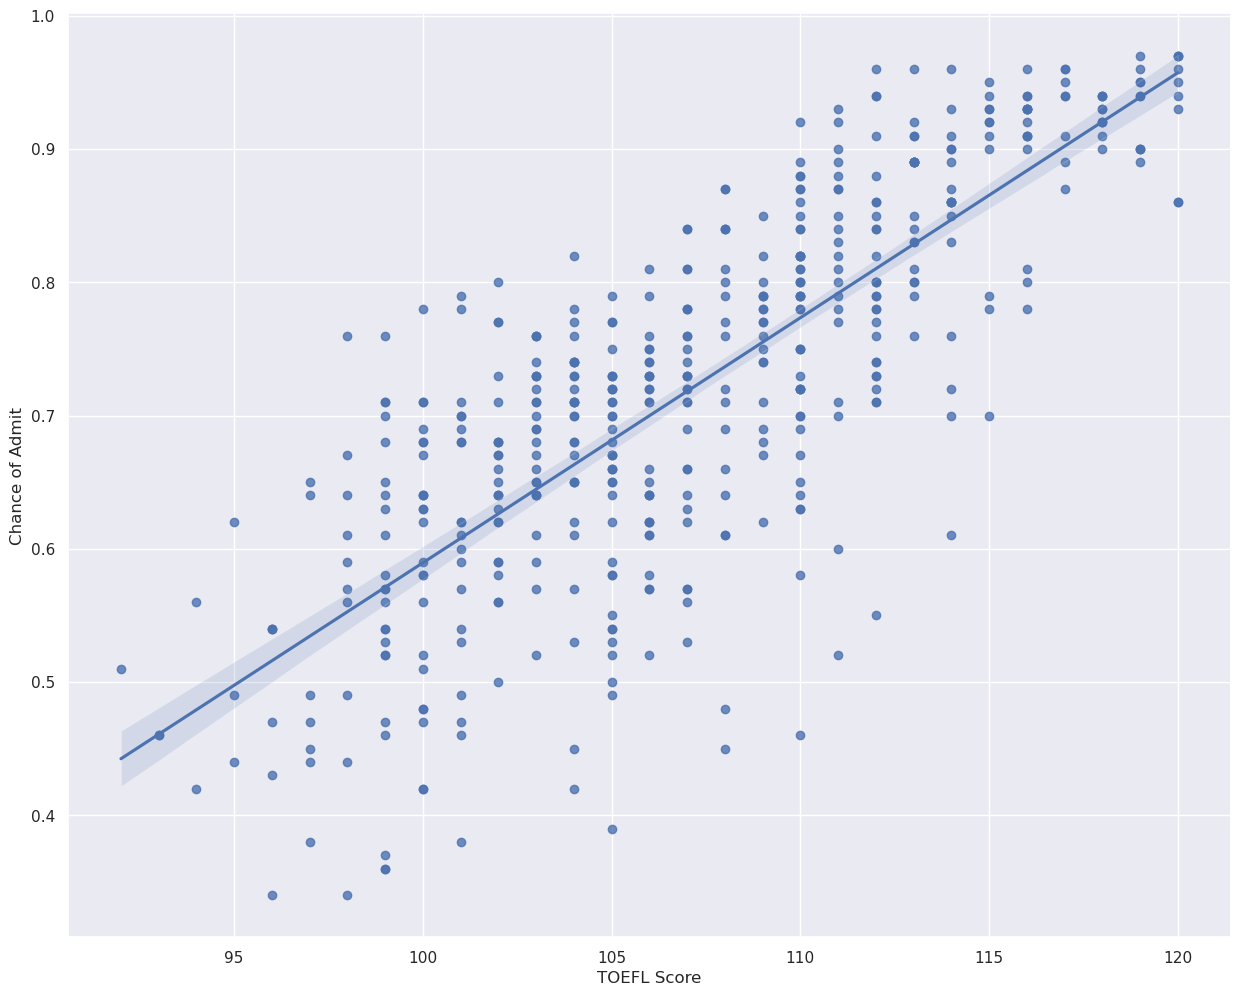

In [16]:
# Plotting the results using seaborn 
plt.figure(figsize=(15,12))
sns.regplot(x='TOEFL Score', y='Chance of Admit', data=data)

In [17]:
# Let's dig deeper to see Pearson Correlation Coefficient
p_coeff,p_value = stats.pearsonr(data['TOEFL Score'],data['Chance of Admit'] )
print('Pearson Coefficient:',p_coeff )
print('Pearson Value:',p_value)

Pearson Coefficient: 0.792227614305083
Pearson Value: 6.729926762328514e-109


Since, its pearson coefficient is almost o.8 and pvalue quite less than 0.001. This seems like an ideal candidate.

# Column: GRE Score(out of 340)


In [18]:
# Checking the correlation coefficient of GRE Score with Chance of Admit
data[['GRE Score','Chance of Admit']].corr()

,GRE Score,Chance of Admit
GRE Score,1.000000,0.810351
Chance of Admit,0.810351,1.000000


It seems like GRE Score is a good fit. 

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

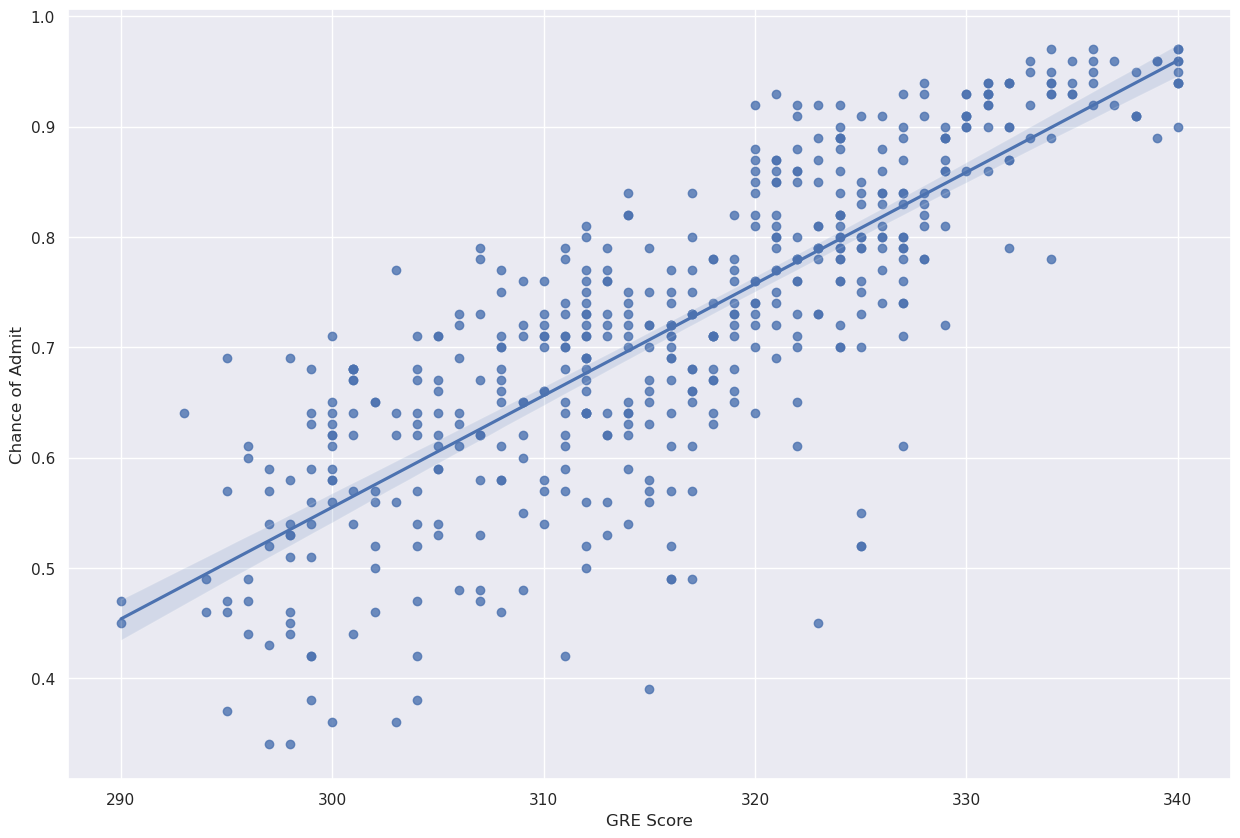

In [19]:
# Plotting the results using seaborn 
plt.figure(figsize=(15,10))
sns.regplot(x='GRE Score', y='Chance of Admit', data=data)

# Column:University Rating(out of 5)

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

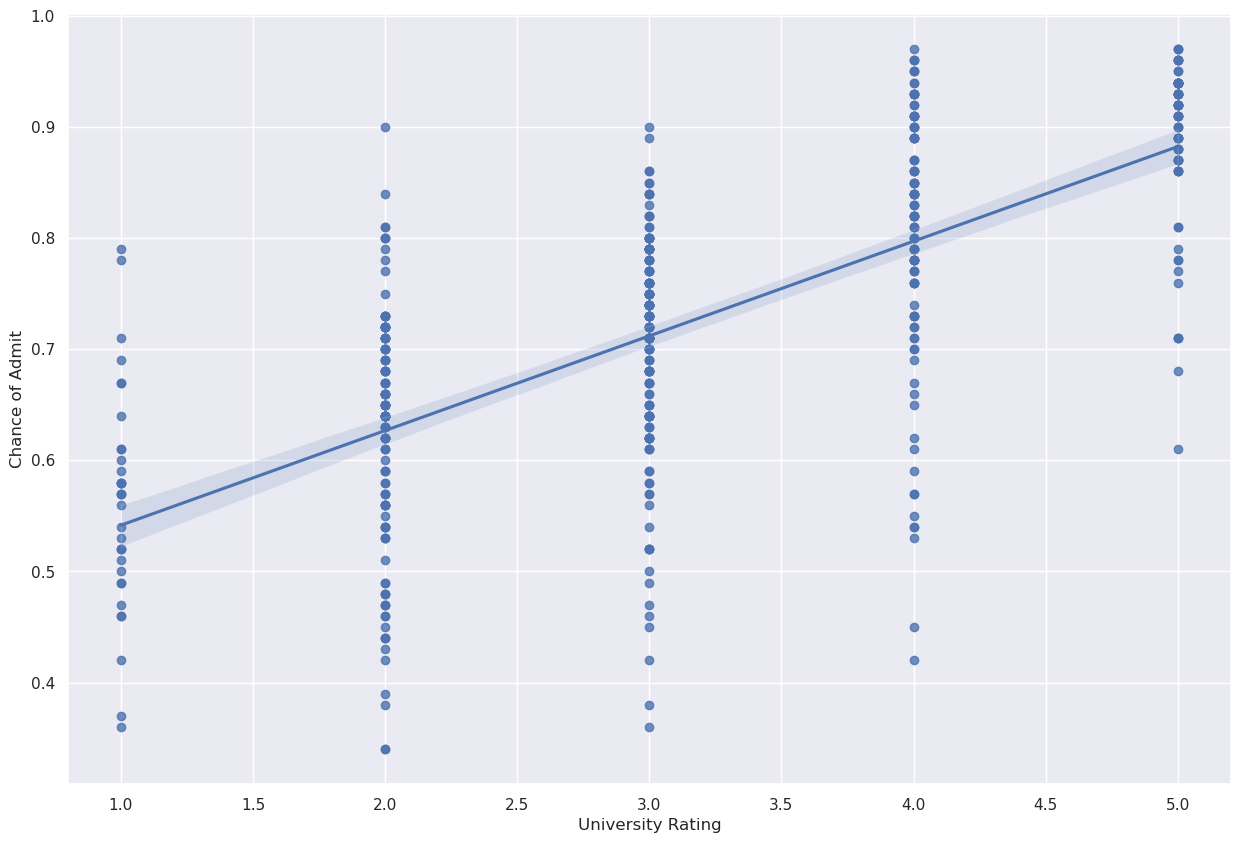

In [20]:
# Plotting the results using seaborn 
plt.figure(figsize=(15,10))
sns.regplot(x='University Rating', y='Chance of Admit', data=data)

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

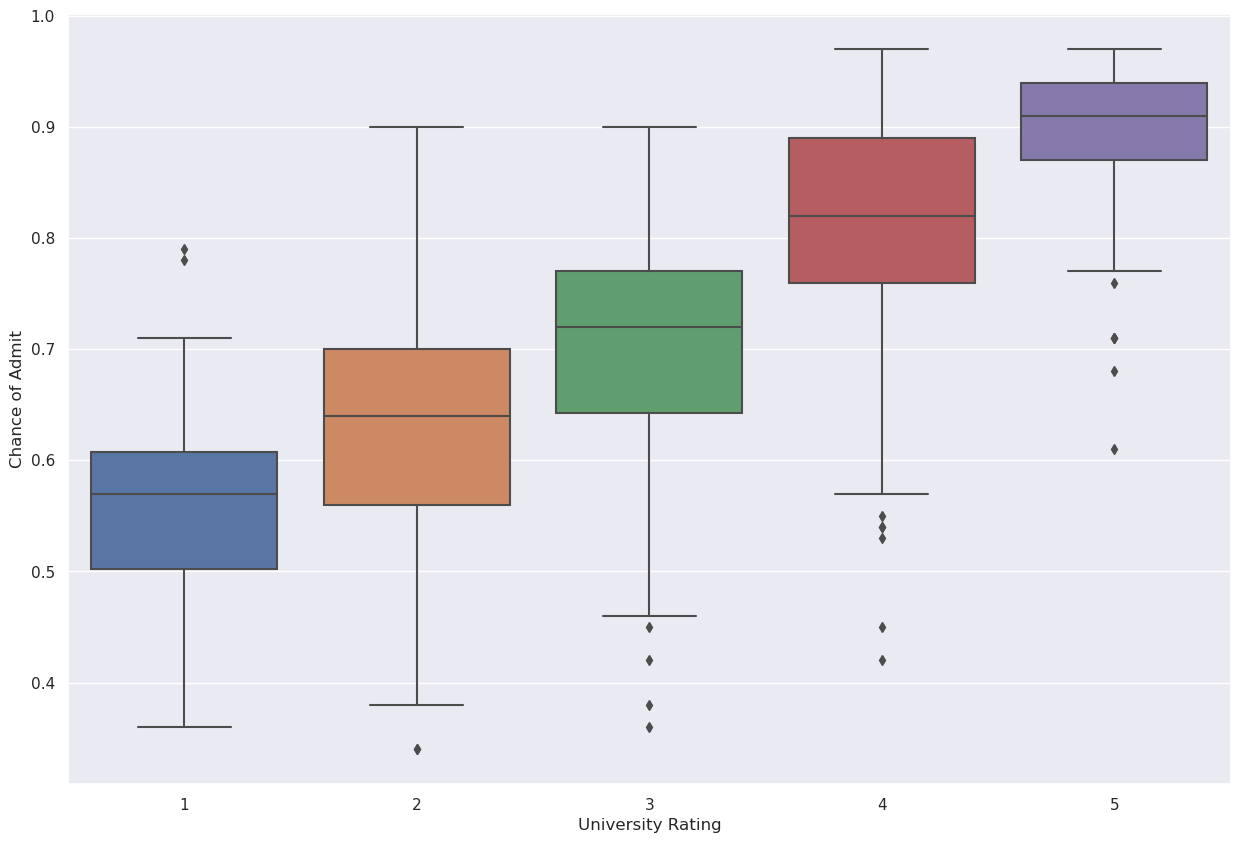

In [21]:
# Plotting using boxplot for better visualization
plt.figure(figsize=(15,10))
sns.boxplot(x='University Rating', y='Chance of Admit', data=data)

In [22]:
# Checking the correlation
data[['University Rating','Chance of Admit']].corr()

,University Rating,Chance of Admit
University Rating,1.000000,0.690132
Chance of Admit,0.690132,1.000000


In [23]:
#Checking the Pearson Correlation
coef,pvalue = stats.pearsonr(data['University Rating'],data['Chance of Admit'])
coef,pvalue

(0.690132368788689, 5.866255627650183e-72)

Pearson Correlation seems good. And the pvalue suggests that it is not by chance.There is a clear trend and a direct proportion. The higher the university rating, the higher the chance of admission and it is a good predictor of the chance of admission. It will be good to consider it in the training the mode but let's quickly check the association in ANOVA table.  

In [24]:
# Grouping first by University Rating
data_rating_grp = data[['University Rating', 'Chance of Admit']].groupby(['University Rating'])
f, pvalue = stats.f_oneway(data_rating_grp.get_group(1)['Chance of Admit'],
                          data_rating_grp.get_group(2)['Chance of Admit'],
                          data_rating_grp.get_group(3)['Chance of Admit'],
                          data_rating_grp.get_group(4)['Chance of Admit'],
                          data_rating_grp.get_group(5)['Chance of Admit'])
print('f oneway:', f, 'n\p value:', pvalue)

f oneway: 114.00804341400004 n\p value: 7.753395328023128e-69


The ANOVA table shows a very strong association between University Rating and Chance of Admit

# Column: SOP or Statement of Purpose(out of 5)

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

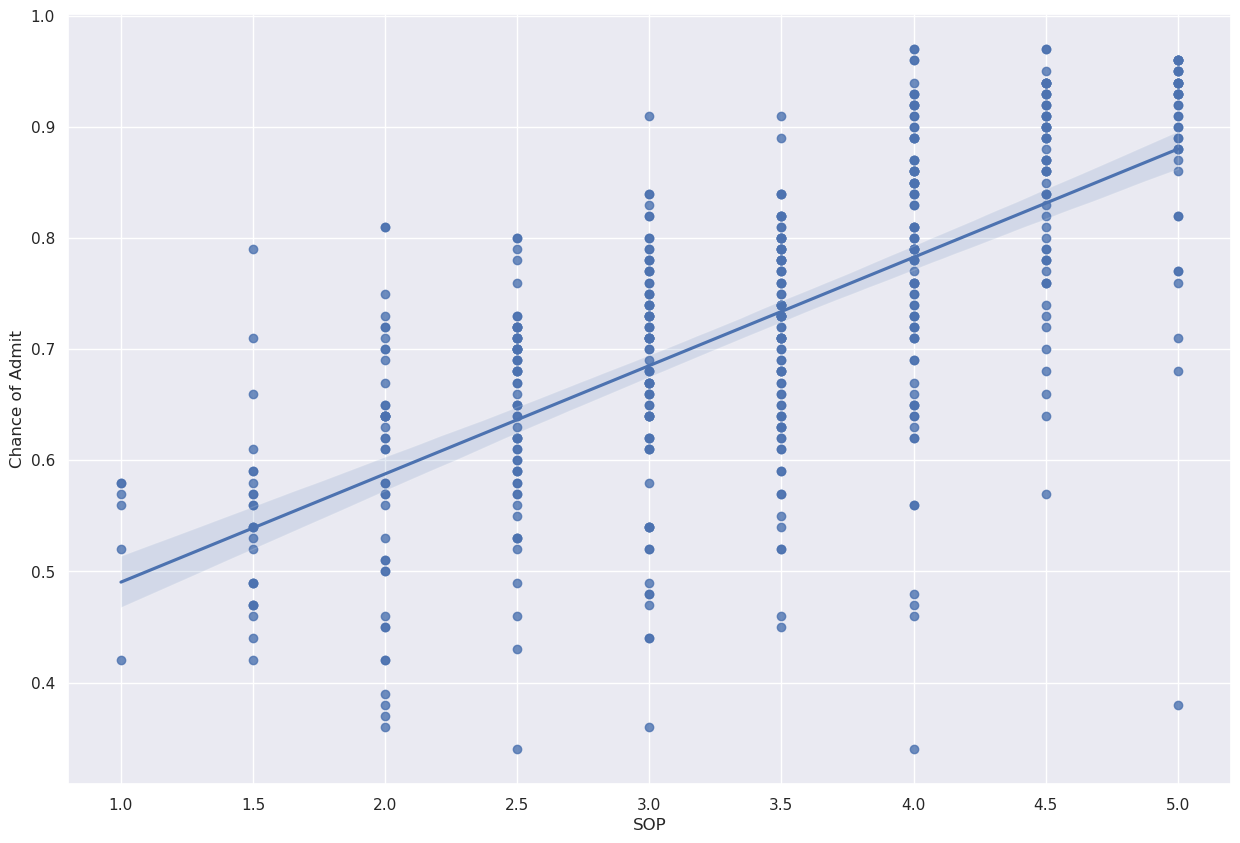

In [25]:
#plotting 
plt.figure(figsize=(15, 10))
sns.regplot(data=data, x='SOP', y='Chance of Admit')

In [26]:
# Checking the correlation
data[['SOP', 'Chance of Admit']].corr()

,SOP,Chance of Admit
SOP,1.000000,0.684137
Chance of Admit,0.684137,1.000000


Let's make a boxplot for a clear visualization and categorical view

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

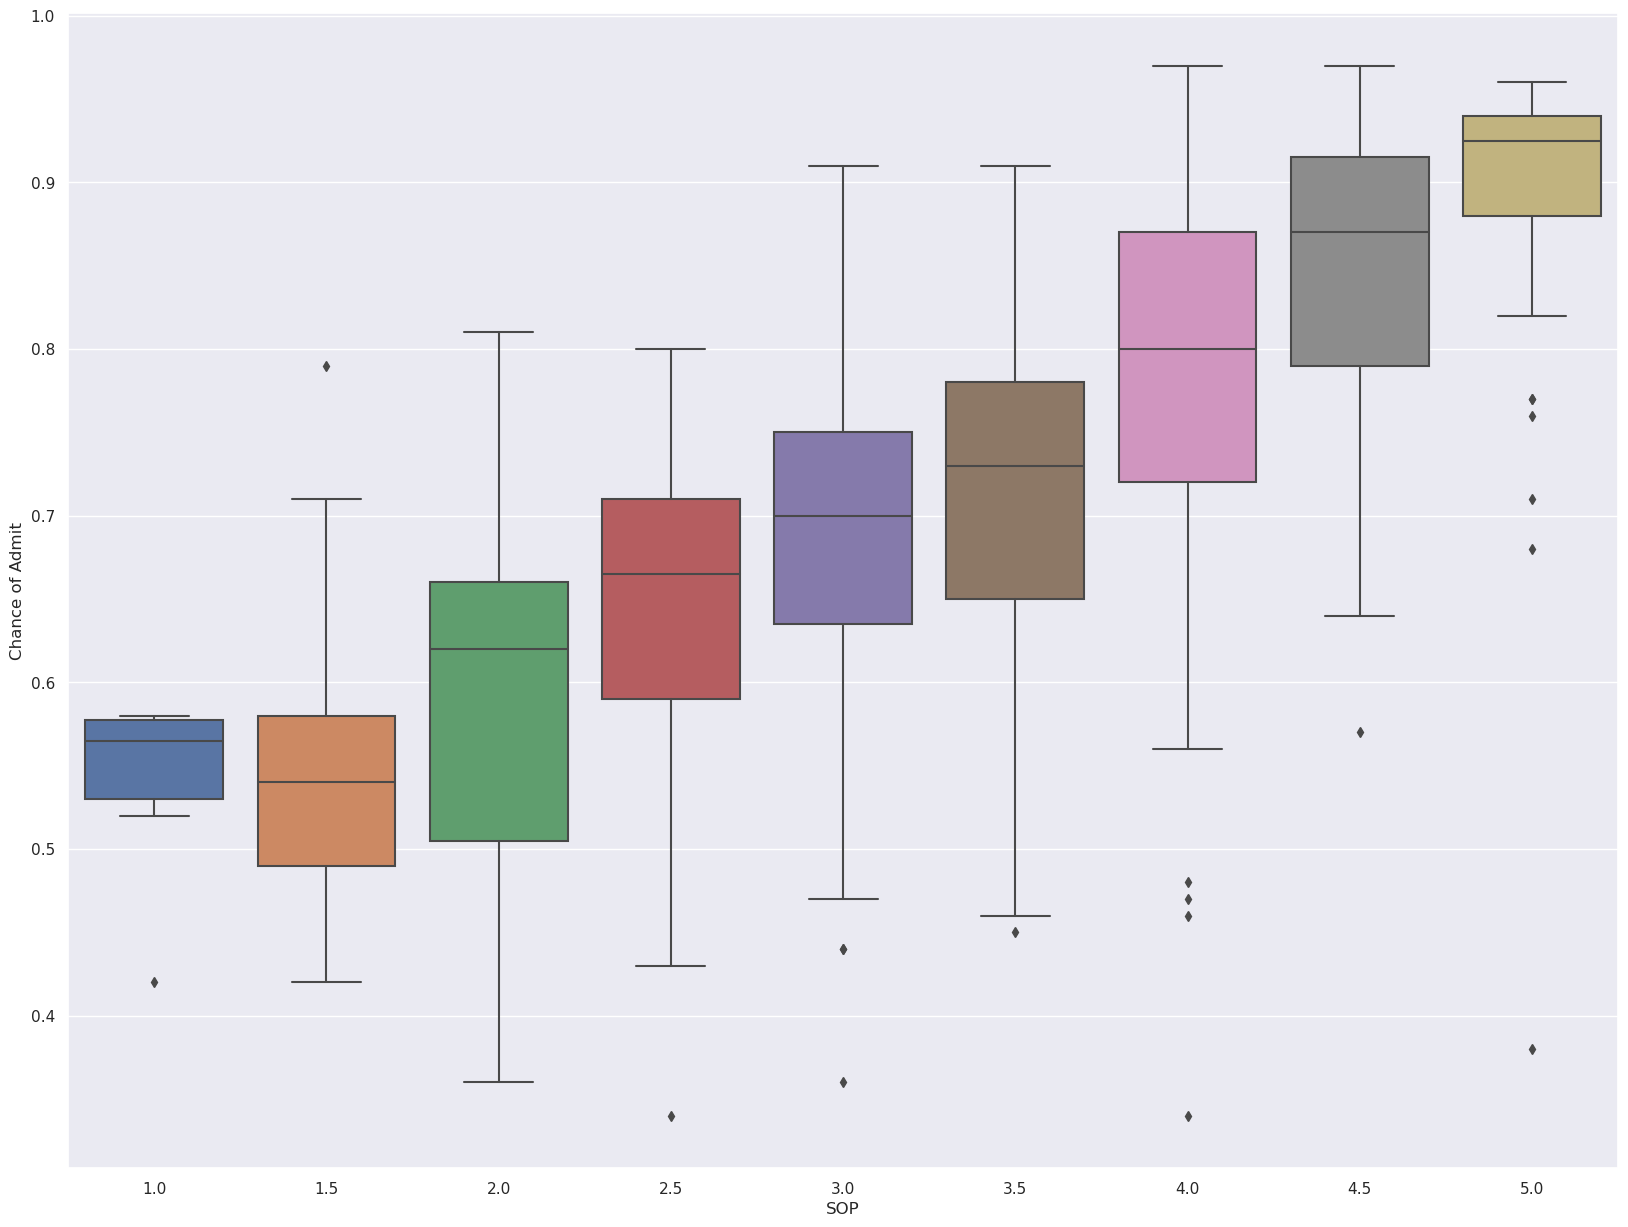

In [27]:
# plotting the column using boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=data, x='SOP', y='Chance of Admit')

From the boxplot there is an increasing trend i.e. SOP is directly proportional to Chance of Admission.

In [28]:
# Let's dig deeper to see Pearson Correlation Coefficient
p_coeff,p_value = stats.pearsonr(data['SOP'],data['Chance of Admit'] )
print('Pearson Coefficient:',p_coeff )
print('Pearson Value:',p_value)

Pearson Coefficient: 0.6841365241316724
Pearson Value: 2.8859074534541132e-70


Let's proceed to use ANOVA table for more insights.

In [29]:
data_sop_grp = data[['SOP', 'Chance of Admit']].groupby(['SOP'])
f, pvalue = stats.f_oneway(data_sop_grp.get_group(1.0)['Chance of Admit'],
                          data_sop_grp.get_group(2.0)['Chance of Admit'],
                          data_sop_grp.get_group(3.0)['Chance of Admit'],
                          data_sop_grp.get_group(4.0)['Chance of Admit'],
                          data_sop_grp.get_group(5.0)['Chance of Admit'])
print('f oneway:', f, 'n\p value:', pvalue)

f oneway: 48.87174705079685 n\p value: 1.738245388473371e-30


Statement of Purpopse from the ANOVA table proves to be a good feature for model building. Let's select it for model building and evaluation.

# Column: LOR(Letter of Recommendation)

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

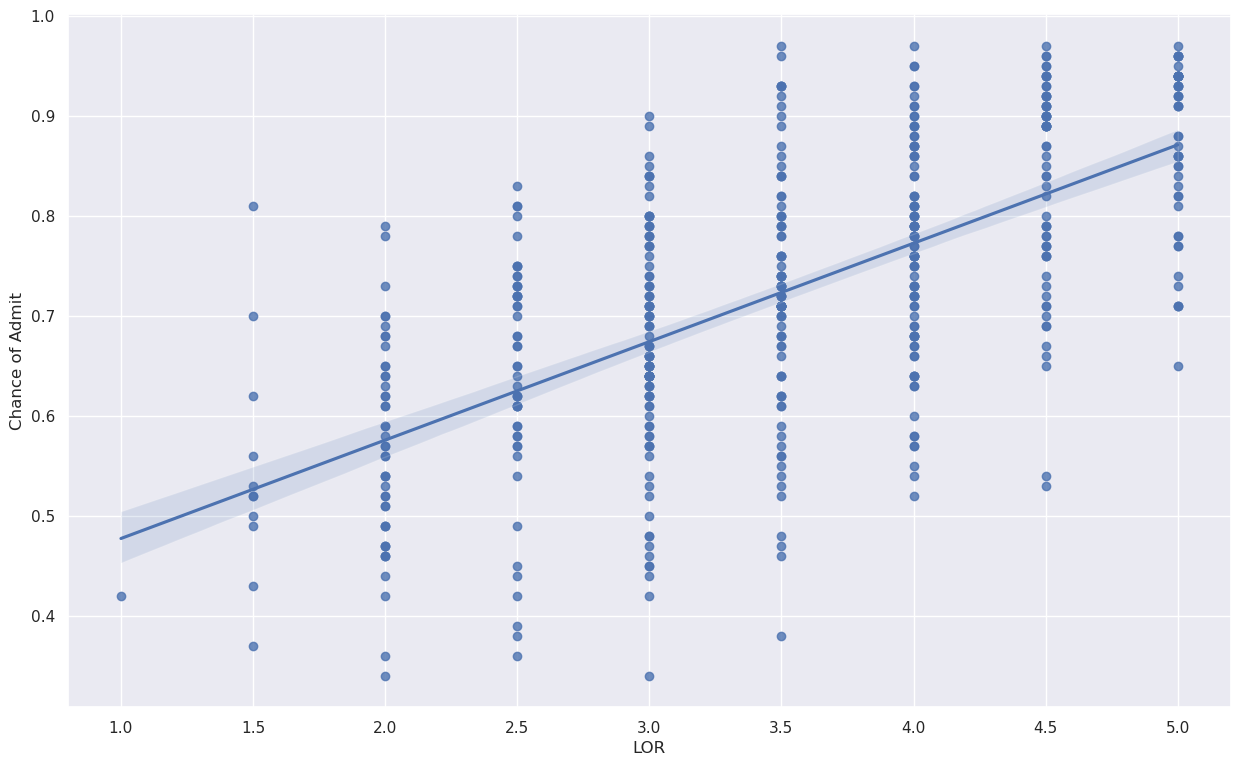

In [30]:
plt.figure(figsize=(15, 9))
sns.regplot(x=data.LOR, y=data['Chance of Admit'])

In [31]:
# Checking the correlation 
data[['LOR', 'Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.645365
Chance of Admit,0.645365,1.000000


In [32]:
p_coeff, pvalue = stats.pearsonr(data.LOR, data['Chance of Admit'])
p_coeff, pvalue

(0.6453645135280106, 3.069932320299405e-60)

Let's proceed to check the ANOVA table.

In [33]:
data_lor_grp = data[['LOR', 'Chance of Admit']].groupby(['LOR'])

In [34]:
f, pvalue = stats.f_oneway(data_lor_grp.get_group(1.0)['Chance of Admit'],
                          data_lor_grp.get_group(1.5)['Chance of Admit'],
                          data_lor_grp.get_group(2.0)['Chance of Admit'],
                          data_lor_grp.get_group(2.5)['Chance of Admit'],
                          data_lor_grp.get_group(3.0)['Chance of Admit'])
print('f oneway:', f, 'n\p value:', pvalue)

f oneway: 8.919353723418007 n\p value: 1.186249824176544e-06


# Column:CGPA

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

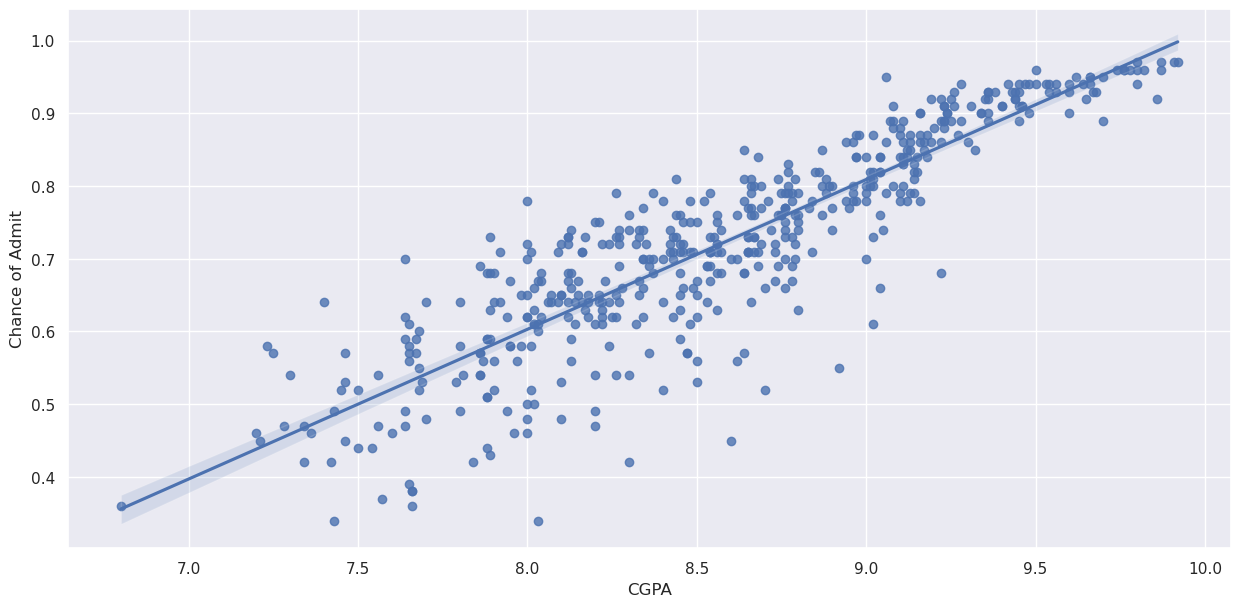

In [35]:
plt.figure(figsize=(15,7))
sns.regplot(x=data.CGPA, y=data['Chance of Admit'])

It seems there is a clear correlation between CGPA and Chance of Admit

In [36]:
# checking pearson correlation
data[['CGPA', 'Chance of Admit']].corr()

,CGPA,Chance of Admit
CGPA,1.000000,0.882413
Chance of Admit,0.882413,1.000000


In [37]:
p_coeff, pvalue = stats.pearsonr(data.CGPA, data['Chance of Admit'])
p_coeff, pvalue

(0.8824125749045743, 3.396544858710999e-165)

It's clear that CGPA is a strong predictor for the model.

# Column: Research

<Axes: xlabel='Research', ylabel='Chance of Admit'>

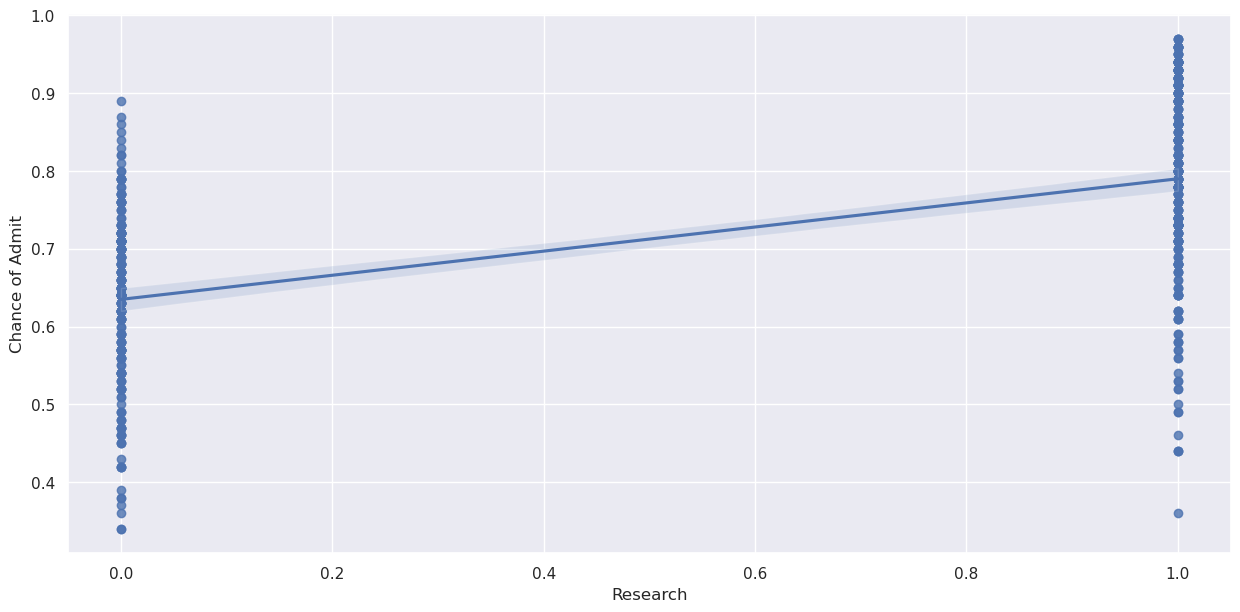

In [38]:
plt.figure(figsize=(15, 7))
sns.regplot(x=data.Research, y=data['Chance of Admit'])

In [39]:
# Checking the correlation
data[['Research', 'Chance of Admit']].corr()

,Research,Chance of Admit
Research,1.000000,0.545871
Chance of Admit,0.545871,1.000000


Let's proceed to look at the countplot for the categorical perspective.

<Axes: xlabel='Research', ylabel='count'>

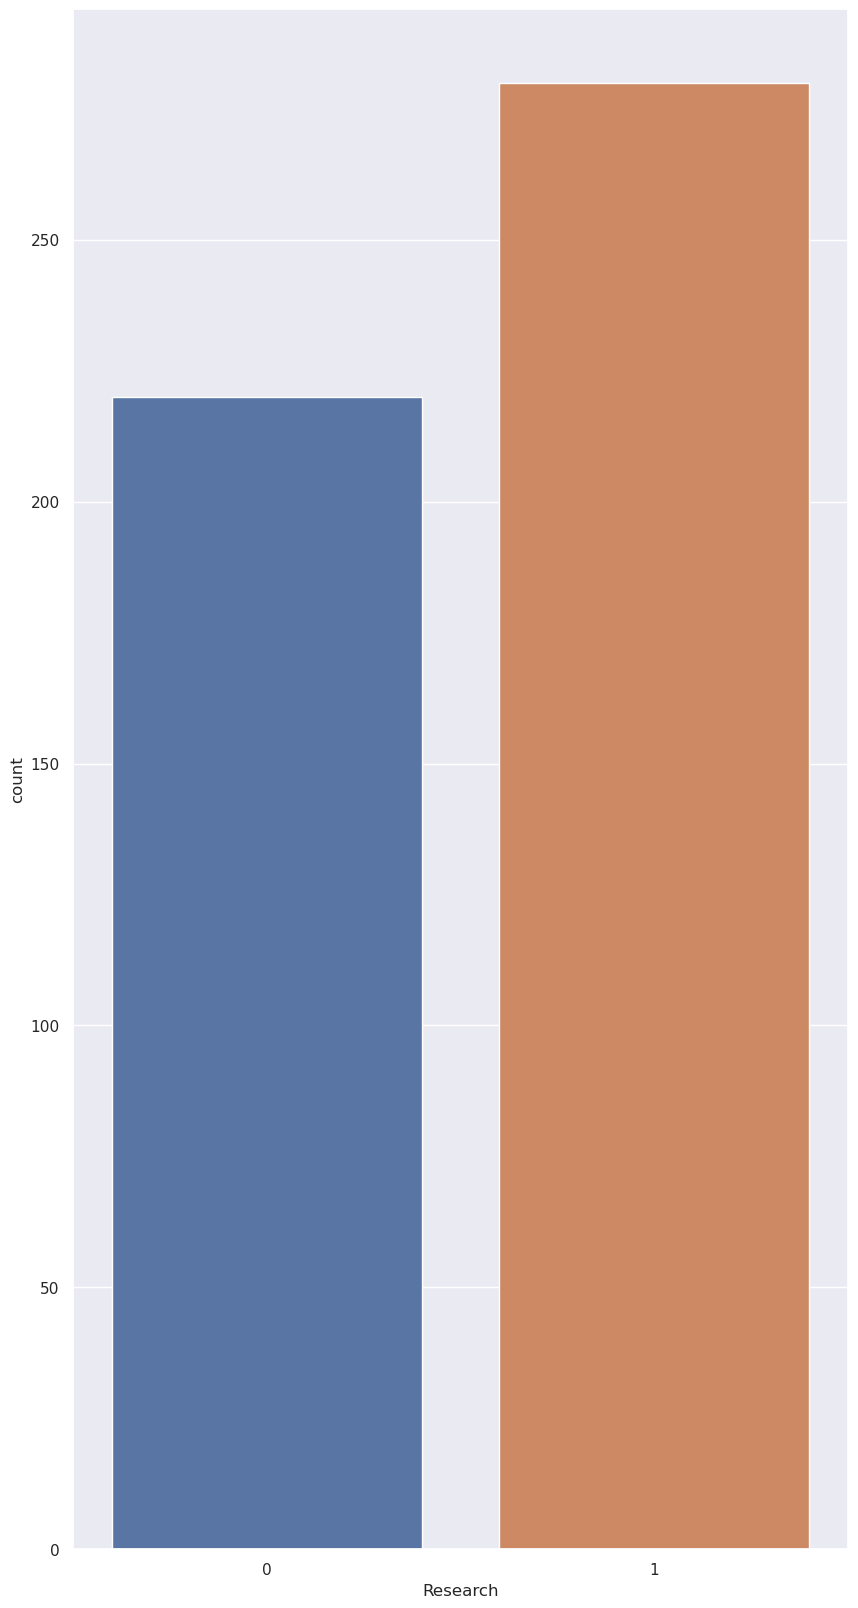

In [40]:
plt.figure(figsize=(10,20))
sns.countplot(x=data.Research)

From the countplot, there are more candidates with research background and without research background are less.

<Axes: xlabel='Research', ylabel='Chance of Admit'>

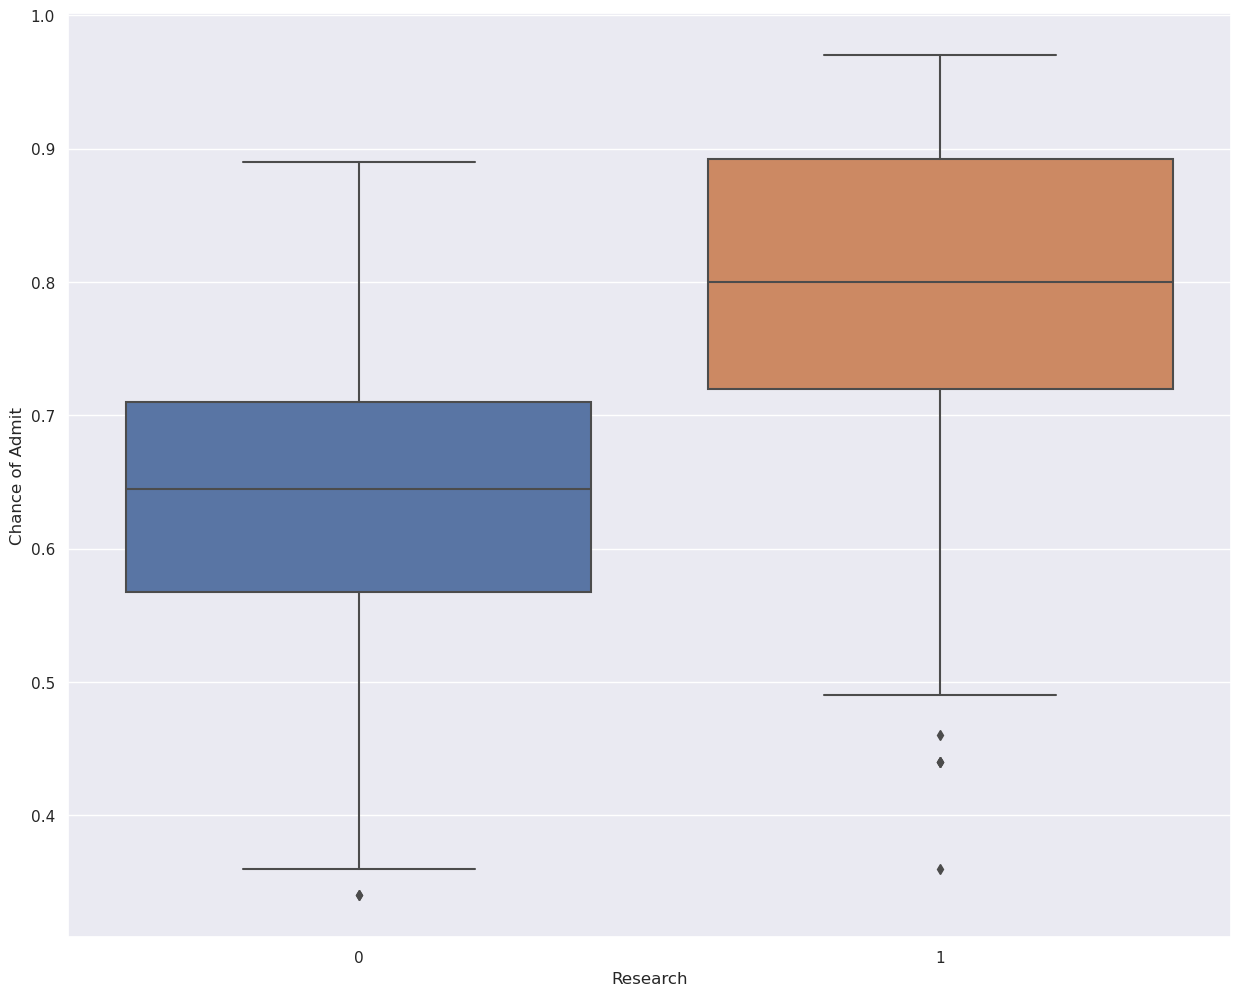

In [41]:
plt.figure(figsize=(15, 12))
sns.boxplot(x=data.Research, y=data['Chance of Admit'])

From the boxplot too it is evident that the chance of admission of those having research background is more than those withoutv a research background. We can proceed to perform ANOVA test too.

In [42]:
data_res_grp = data[['Research', 'Chance of Admit']].groupby(['Research'])

In [43]:
f, pvalue = stats.f_oneway(data_res_grp.get_group(1)['Chance of Admit'],
                          data_res_grp.get_group(0)['Chance of Admit'])
f,pvalue

(211.37662941712796, 3.5954935458406797e-40)

# Descriptive Analytics: Analyzing predictors amonth themselves

<Axes: >

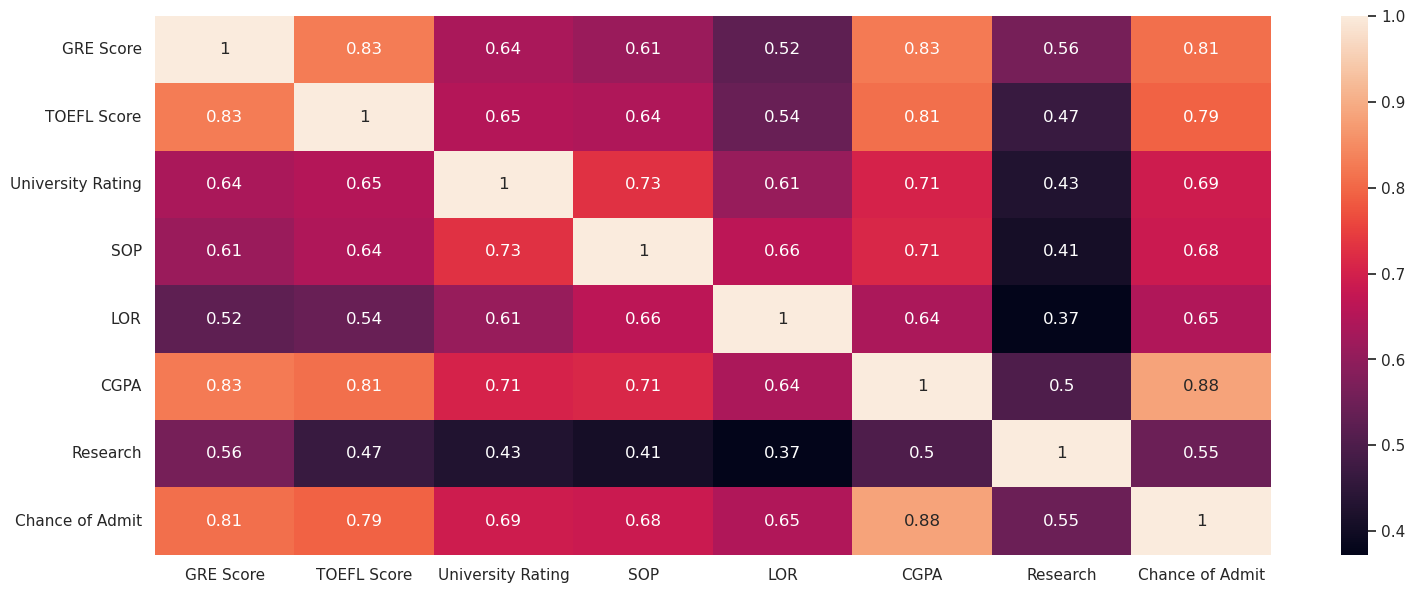

In [44]:
#Checking the heatmap of correlation for all the columns or features
plt.figure(figsize=(18, 7))
sns.heatmap(data.corr(), annot=True)

Well, by looking at the heatmap, we can infer that there exists great multicollinearity in the data.

# GRE Score and CGPA

<Axes: title={'center': 'Relationship between CGPA and GRE Score'}, xlabel='GRE Score', ylabel='CGPA'>

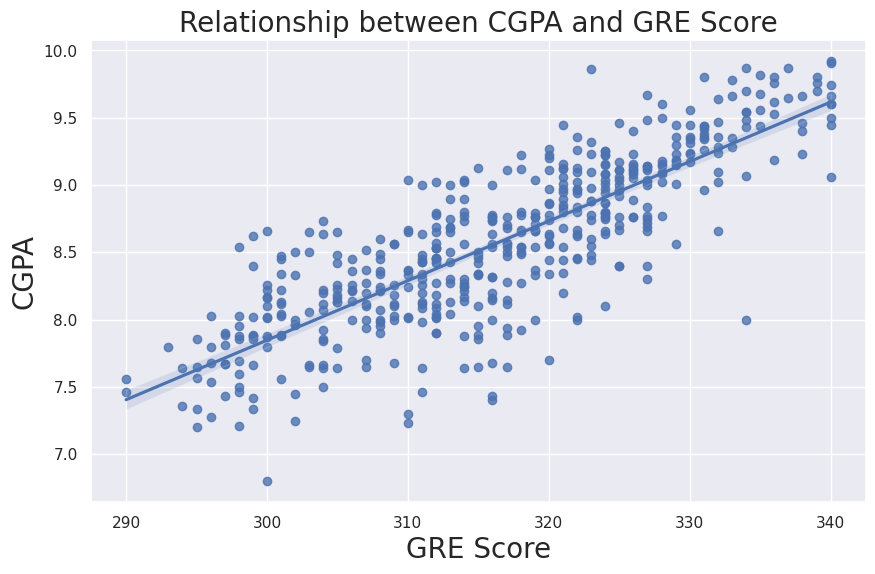

In [45]:
plt.figure(figsize=(10,6))
plt.title('Relationship between CGPA and GRE Score', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
sns.regplot(x=data['GRE Score'], y=data.CGPA)

From the above plot , it is evident that students with high GRE Score tend to get higher CGPA as compared to others.

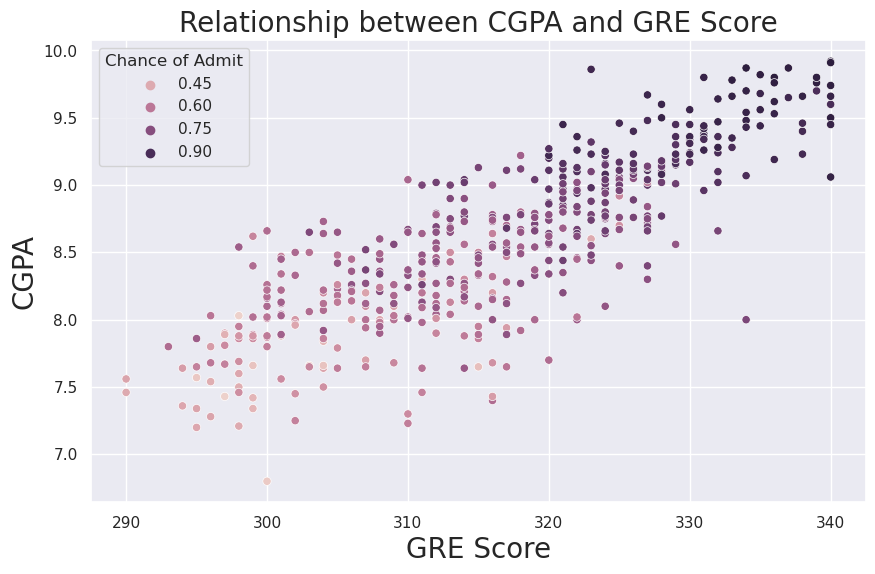

In [46]:
# Comparing the above plot with the Chance of Admission
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GRE Score'],y=data.CGPA, hue=data['Chance of Admit'])
plt.title('Relationship between CGPA and GRE Score', fontsize=20)
plt.xlabel('GRE Score', fontsize=20)
plt.ylabel('CGPA', fontsize=20)
plt.show()

Chance of Admission is higher for those having greater CGPA and GRE Score.

# Predicting Admissions


First of all, let's separate the label (y) from the data (x)

In [47]:
X = data.drop('Chance of Admit', axis=1)
Y = data[['Chance of Admit']]
X.shape, Y.shape

((500, 7), (500, 1))

Separating training and testing data

In [48]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, shuffle=True, test_size=0.30)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(350, 7) (350, 1)
(150, 7) (150, 1)


# Reducing multicollinearity using regularization

The dataset we are using is multicollinear so let's first reduce that using the regularization.

In [49]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(random_state=42, n_jobs=4)

lasso.fit(xtrain, ytrain)
regularized_model_prediction = lasso.predict(xtest)

We proceed to check the R-Squared Coefficient of it.

In [50]:
from sklearn.metrics import r2_score
r2_score(ytest, regularized_model_prediction)

0.820583139025215

The score  seems to be good and we can proceed to increase the model complexity.

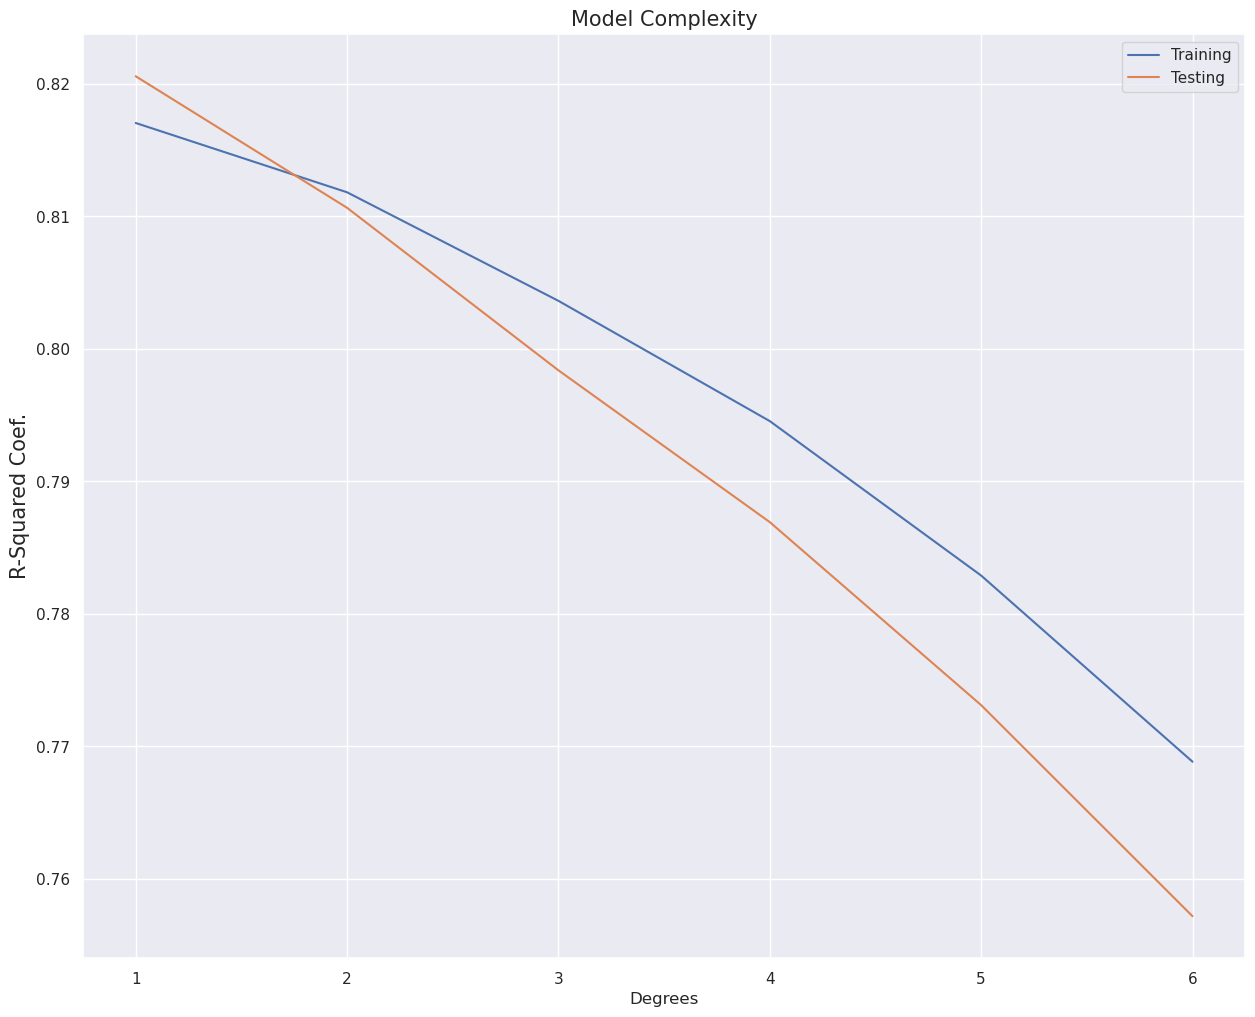

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the degree of polynomial from 1 to 6
train_r2_scores = []
test_r2_scores = []
for degree in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly = model_poly.fit_transform(xtrain)  # Fit-transform only once for each set
    xtest_poly = model_poly.transform(xtest)        # Transform using the same model
    
    # Initializing LassoCV
    model_lasso = LassoCV(random_state=42, n_jobs=4, cv=5)  # Fixed variable name and class instantiation
    model_lasso.fit(xtrain_poly, ytrain)
    
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_lasso.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_lasso.predict(xtest_poly)))
    
# Displaying the model complexity
plt.figure(figsize=(15, 12))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=12)
plt.ylabel('R-Squared Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.show()


In [54]:
list(zip(train_r2_scores, test_r2_scores))

[(0.817056397862837, 0.8205831390252154),
 (0.8118252950330801, 0.8106546294010814),
 (0.8036328552457941, 0.7983888922316118),
 (0.7945552028478606, 0.786931798126712),
 (0.7828994245859594, 0.7731189641603302),
 (0.7688489667890385, 0.7571866311971951)]

Well, by looking at the graph above, we can select the first or second degree.But it is getting rather difficult selecting the right degree(Overfitting is difficult to recognize at this point).Now let's check the complexity on RidgeCV(L2 Regularization).

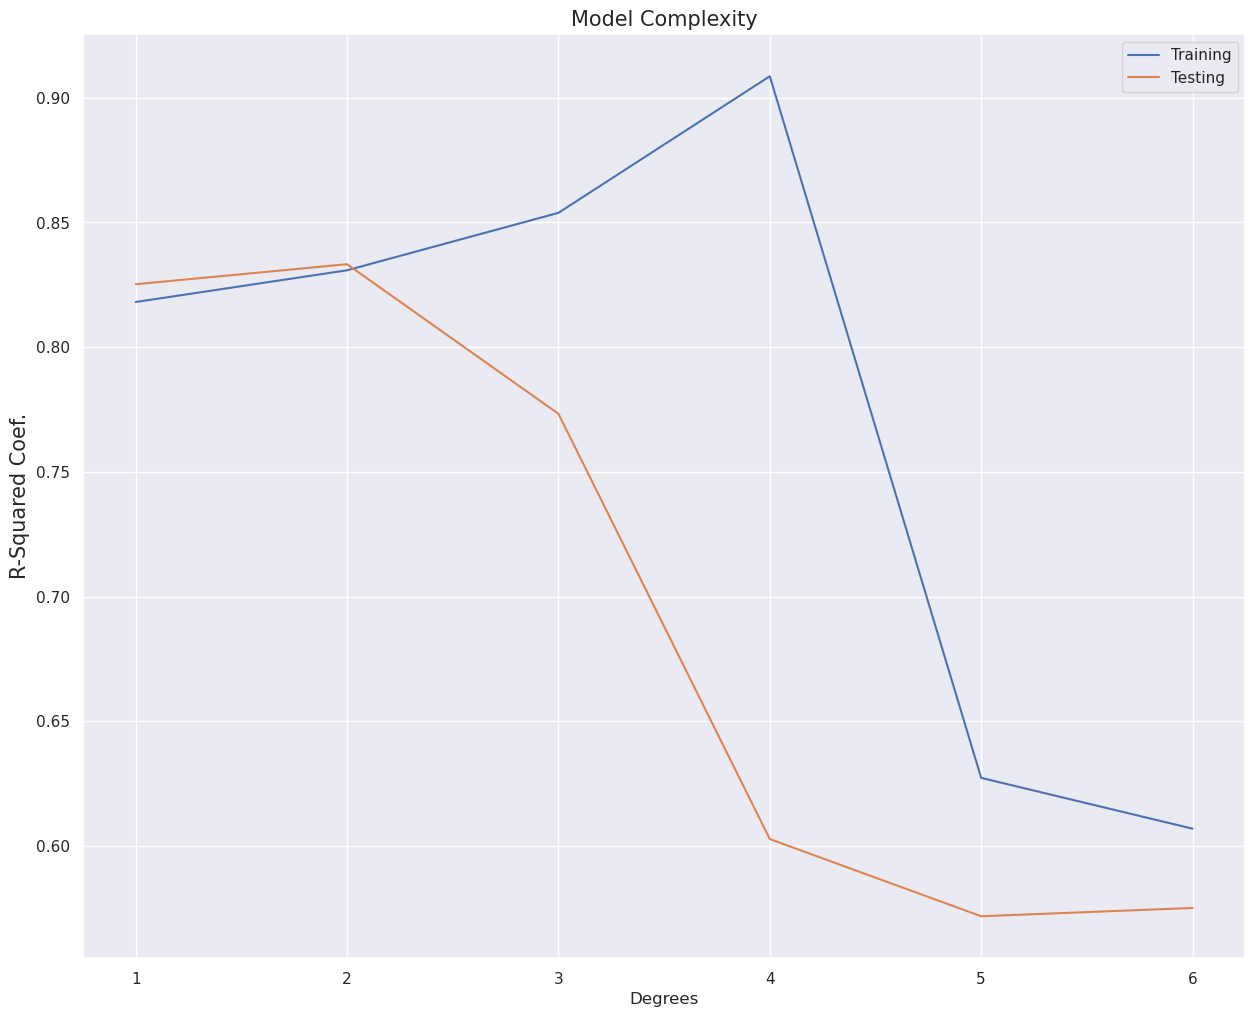

In [55]:
from sklearn.linear_model import RidgeCV
#CheCking the degree of polynomial from 1 to 6
train_r2_scores = []
test_r2_scores = []
for degree in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly = model_poly.fit_transform(xtrain)  # Fit-transform only once for each set
    xtest_poly = model_poly.transform(xtest)        # Transform using the same model
    
    # Initializing LassoCV
    model_ridge = RidgeCV(cv=5)  # Fixed variable name and class instantiation
    model_ridge.fit(xtrain_poly, ytrain)
    
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_ridge.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_ridge.predict(xtest_poly)))
    
# Displaying the model complexity
plt.figure(figsize=(15, 12))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=12)
plt.ylabel('R-Squared Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.show()

In [57]:
list(zip(train_r2_scores, test_r2_scores))

[(0.8181067830196194, 0.8252330309714186),
 (0.8308240346625836, 0.8332649801156914),
 (0.8538622132043002, 0.7732757728698438),
 (0.9086293379489839, 0.6027613408223286),
 (0.6272903533073013, 0.5718069109401404),
 (0.6069290710980284, 0.5751296216418347)]

Looking at degree2, R-Squared Coefficient is o.8308 which seems good.